<a href="https://colab.research.google.com/github/chandra17iith/My_ML/blob/main/Insurance_Kaggle_competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Insurance Premium Prediction Using Kaggle Dataset

This project predicts insurance premium amounts based on various customer features using machine learning techniques. It utilizes the Kaggle dataset from the Playground Series (Season 4, Episode 12).

## Table of Contents
1. [Project Overview](#project-overview)
2. [Dataset](#dataset)
3. [Features](#features)
4. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
5. [Preprocessing and Feature Engineering](#preprocessing-and-feature-engineering)
6. [Model Training and Evaluation](#model-training-and-evaluation)
7. [Submission](#submission)
8. [How to Run](#how-to-run)
9. [Dependencies](#dependencies)
10. [Results](#results)

---

## Project Overview
The project uses data from a Kaggle competition to predict insurance premiums. It includes exploratory data analysis, feature engineering, and testing different machine learning models like linear regression, random forest, and gradient boosting regressors.
* Link for the data -> https://www.kaggle.com/competitions/playground-series-s4e12/data

---

## Dataset
The dataset contains information about customers, such as their demographic and financial details, along with historical insurance information. Key files used:
- `train.csv`: Training data.
- `test.csv`: Test data for predictions.
- `sample_submission.csv`: Template for submission.

The dataset is downloaded directly from the Kaggle competition using the `opendatasets` library.

---

## Features
### Numerical Features:
- Age
- Annual Income
- Number of Dependents
- Health Score
- Previous Claims
- Vehicle Age
- Credit Score
- Insurance Duration

### Categorical Features:
- Gender
- Marital Status
- Education Level
- Occupation
- Location
- Policy Type
- Customer Feedback
- Smoking Status
- Exercise Frequency
- Property Type

---

## Exploratory Data Analysis (EDA)
The following analyses are performed:
- Histograms and boxplots for numerical data.
- Count plots and boxplots for categorical data.
- Correlation heatmap for numerical features.

---

## Preprocessing and Feature Engineering
1. **Handling Missing Data**:
   - Numerical columns: Imputed using the median.
   - Categorical columns: Filled with "Unknown."

2. **Feature Scaling**:
   - Scaled numerical columns using MinMaxScaler.

3. **Encoding Categorical Features**:
   - One-hot encoding for categorical features.

---

## Model Training and Evaluation
The following models are trained:
1. **Linear Regression**: Evaluated using K-Fold cross-validation and RMSLE (Root Mean Squared Logarithmic Error).
2. **Random Forest Regressor**: Evaluated using RMSLE.
3. **Gradient Boosting Regressor**: Evaluated using RMSLE.

Stacking and other ensemble techniques can be added for better performance.

---

## Submission
Predicted premium amounts are saved to `submission.csv` in the required Kaggle submission format.

---

## How to Run
1. Clone this repository.
2. Install dependencies listed below.
3. Run the Python script `insurance_kaggle_competition.py`.

---

## Dependencies
- Python 3.x
- pandas
- numpy
- matplotlib
- seaborn
- scikit-learn
- opendatasets

To install the dependencies, run:
```bash
pip install -r requirements.txt
```
---

## Results
The project evaluates models based on RMSLE. Random Forest and Gradient Boosting yield the best results with feature importance plotted for insights.

In [2]:
!pip install opendatasets --upgrade --quiet

# Importing Libraries and Downloading dataset

In [3]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od
import os
import warnings
warnings.filterwarnings('ignore')

In [4]:
data_url='https://www.kaggle.com/competitions/playground-series-s4e12/data'

In [5]:
od.download('https://www.kaggle.com/competitions/playground-series-s4e12/data')

Skipping, found downloaded files in "./playground-series-s4e12" (use force=True to force download)


In [6]:
train_df=pd.read_csv('./playground-series-s4e12/train.csv')
test_df=pd.read_csv('./playground-series-s4e12/test.csv')
submission_test_df=pd.read_csv('./playground-series-s4e12/sample_submission.csv')

In [7]:
train_df.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [9]:
train_df.describe()

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,1.200000e+06,1.181295e+06,1.155051e+06,1.090328e+06,1.125924e+06,835971.000000,1.199994e+06,1.062118e+06,1.199999e+06,1.200000e+06
mean,5.999995e+05,4.114556e+01,3.274522e+04,2.009934e+00,2.561391e+01,1.002689,9.569889e+00,5.929244e+02,5.018219e+00,1.102545e+03
std,3.464103e+05,1.353995e+01,3.217951e+04,1.417338e+00,1.220346e+01,0.982840,5.776189e+00,1.499819e+02,2.594331e+00,8.649989e+02
min,0.000000e+00,1.800000e+01,1.000000e+00,0.000000e+00,2.012237e+00,0.000000,0.000000e+00,3.000000e+02,1.000000e+00,2.000000e+01
25%,2.999998e+05,3.000000e+01,8.001000e+03,1.000000e+00,1.591896e+01,0.000000,5.000000e+00,4.680000e+02,3.000000e+00,5.140000e+02
50%,5.999995e+05,4.100000e+01,2.391100e+04,2.000000e+00,2.457865e+01,1.000000,1.000000e+01,5.950000e+02,5.000000e+00,8.720000e+02
75%,8.999992e+05,5.300000e+01,4.463400e+04,3.000000e+00,3.452721e+01,2.000000,1.500000e+01,7.210000e+02,7.000000e+00,1.509000e+03
max,1.199999e+06,6.400000e+01,1.499970e+05,4.000000e+00,5.897591e+01,9.000000,1.900000e+01,8.490000e+02,9.000000e+00,4.999000e+03


In [10]:
train_df.isna().sum()

,0
id,0
Age,18705
Gender,0
Annual Income,44949
Marital Status,18529
Number of Dependents,109672
Education Level,0
Occupation,358075
Health Score,74076
Location,0


In [11]:
train_df.duplicated().sum()

0

we have some missing values but there is no duplicate value

# Identifying Numerical and Categorical column

In [12]:
num_cols=train_df.select_dtypes(include=np.number).columns.tolist()
cat_cols=train_df.select_dtypes(include='object').columns.tolist()

In [13]:
print(f"numerical columns: {num_cols}")
print(f"categorical columns: {cat_cols}")

numerical columns: ['id', 'Age', 'Annual Income', 'Number of Dependents', 'Health Score', 'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Premium Amount']
categorical columns: ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Policy Start Date', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type']


# EDA

In [14]:
sample_data  = train_df.groupby("Premium Amount").sample(frac=0.2, random_state= 8).reset_index(drop = True)

## Visualising numerical data

In [15]:
sns.set_style('darkgrid')

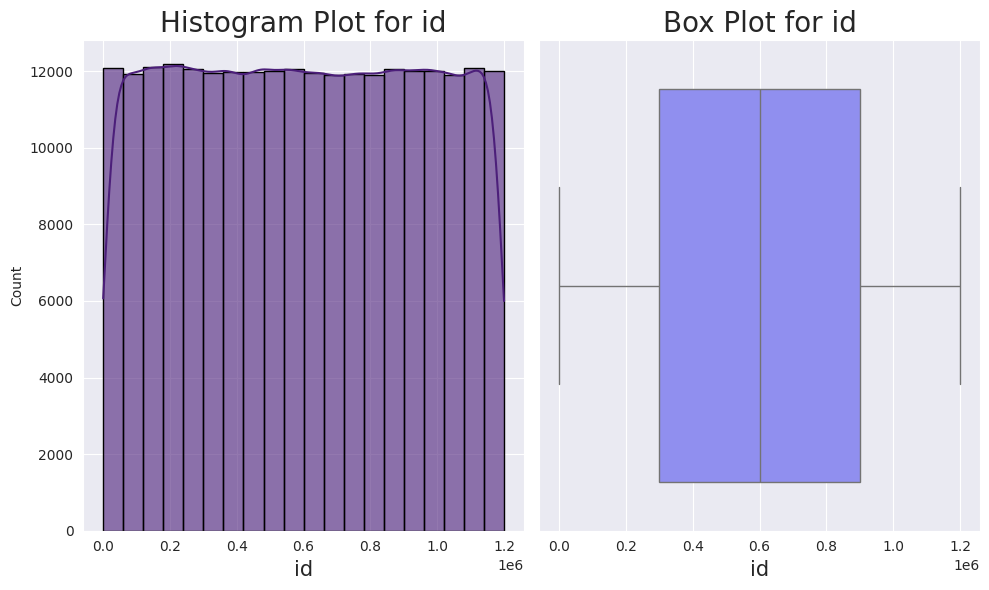

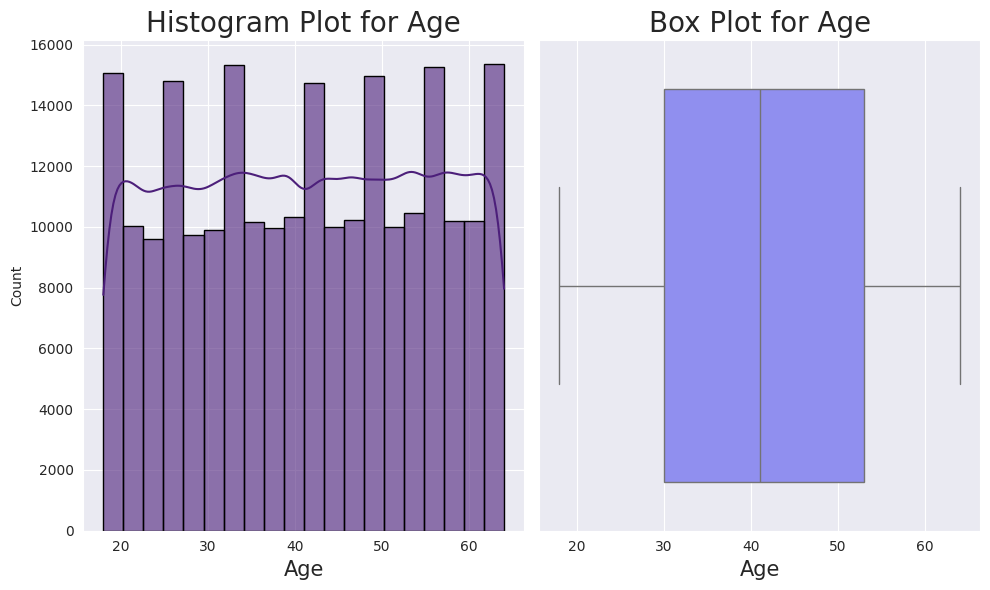

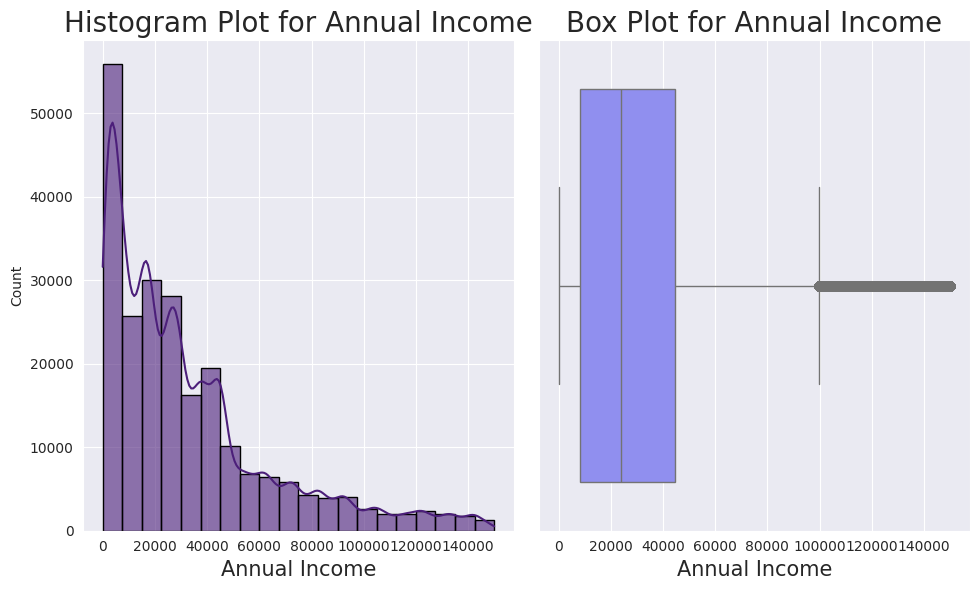

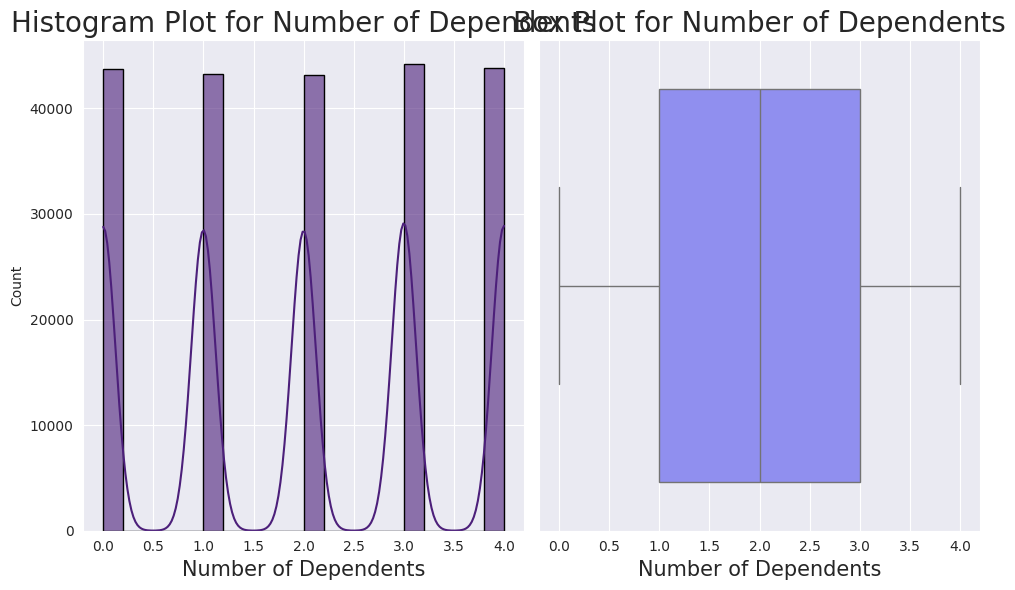

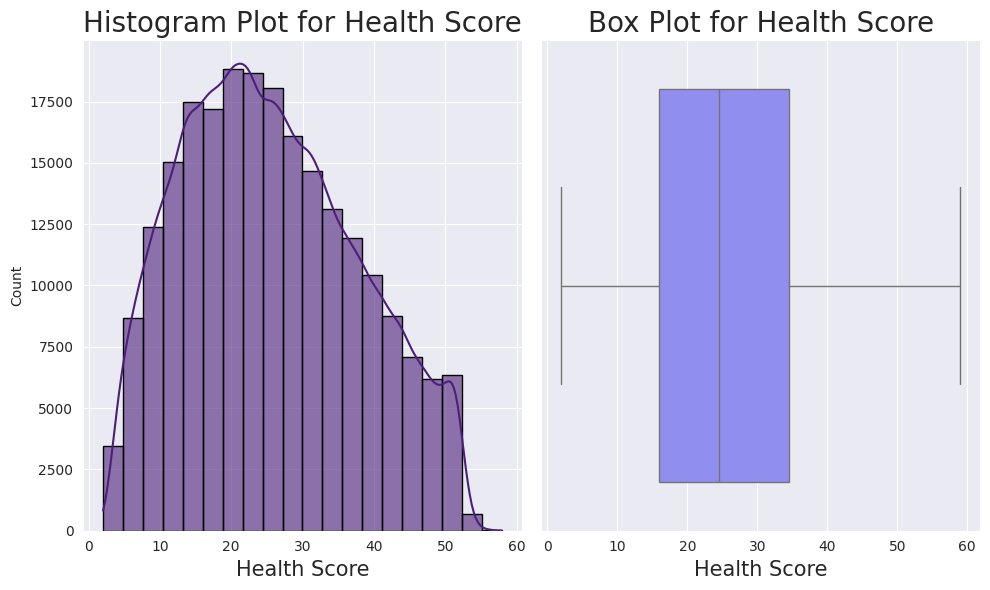

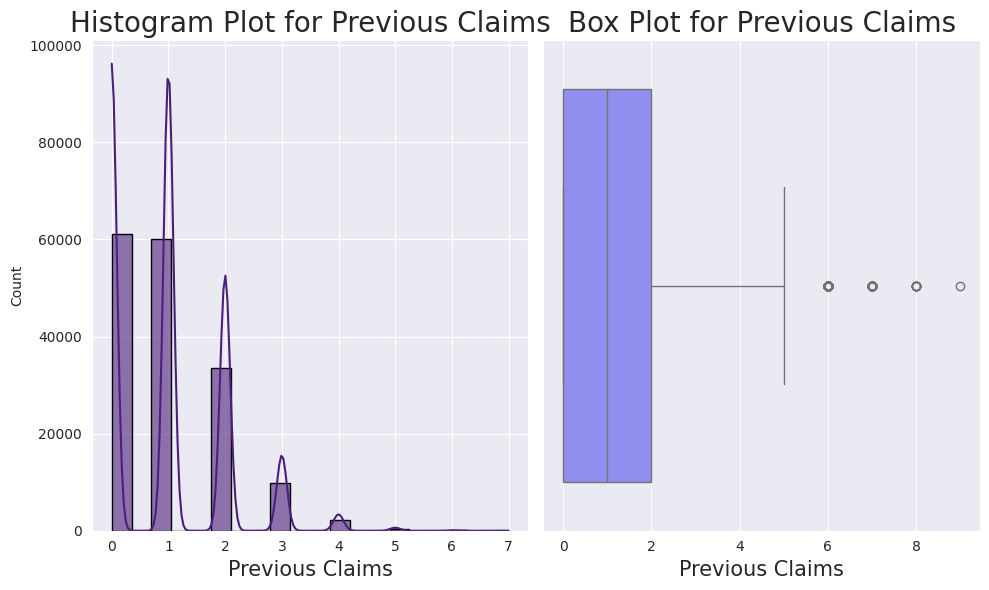

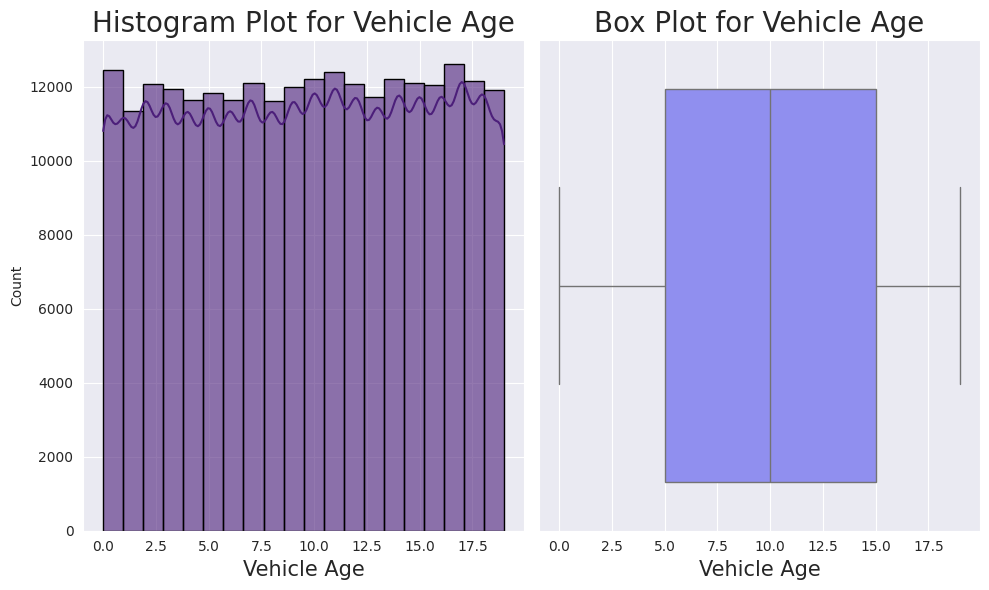

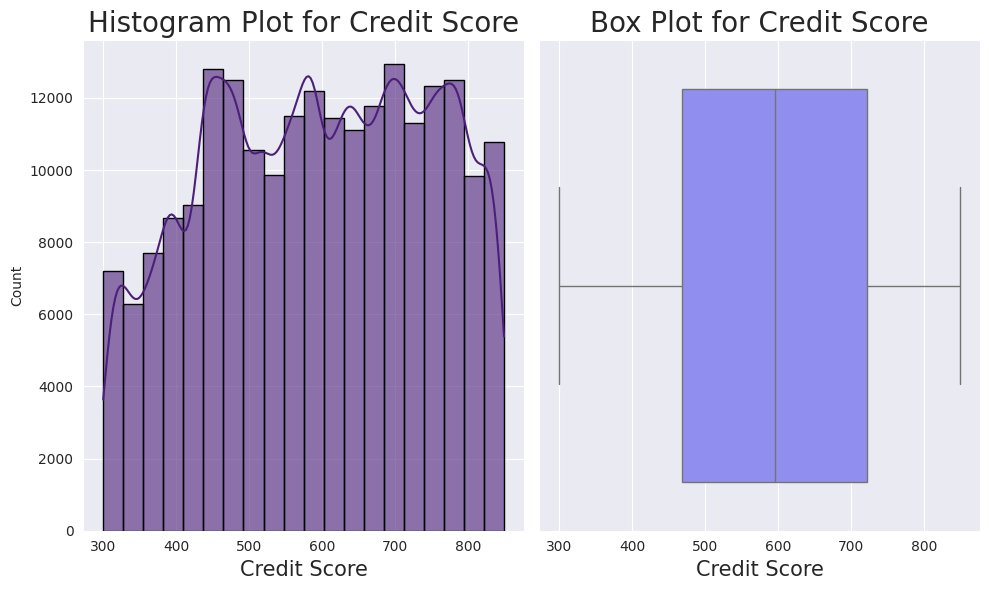

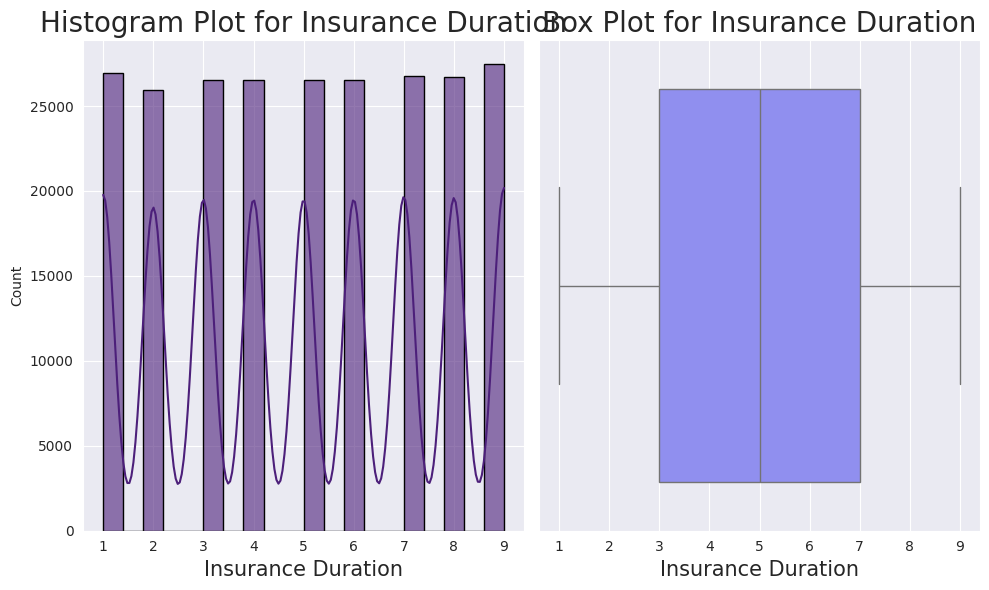

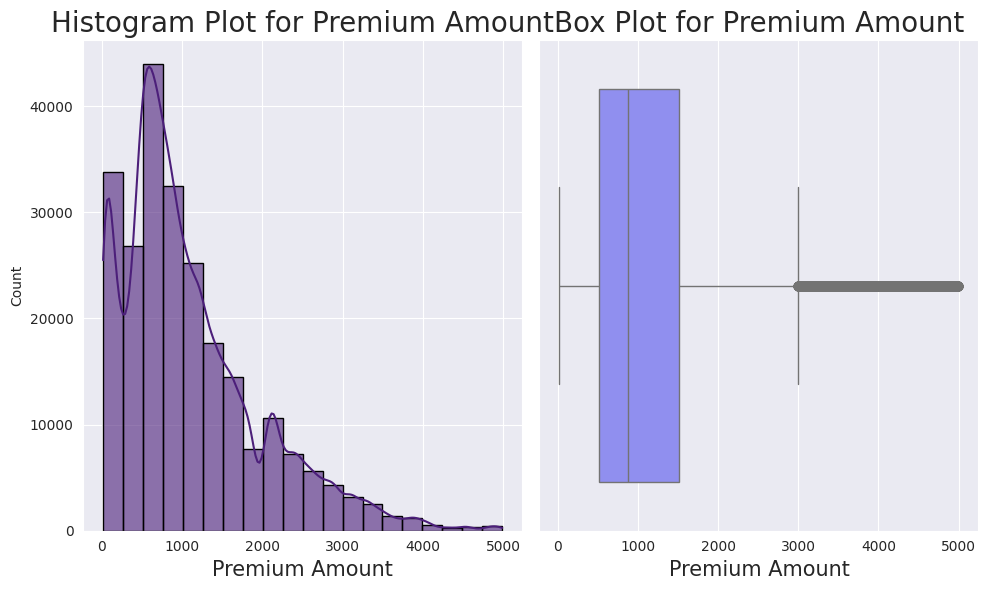

In [16]:
for i in num_cols:
    fig , axes = plt.subplots(1,2 ,figsize= (10,6))
    # HistPlot
    sns.histplot(sample_data , x=i ,bins= 20,kde=True ,color ='#4C1F7A' ,edgecolor = 'black', alpha =0.6 ,ax= axes[0])
    axes[0].set_title(f"Histogram Plot for {i}" , fontsize = 20)
    axes[0].set_xlabel(i , fontsize=15)
    # BoxPlot
    sns.boxplot(train_df , x=i ,palette= 'cool', ax = axes[1])
    axes[1].set_title(f"Box Plot for {i}" , fontsize = 20)
    axes[1].set_xlabel(i , fontsize=15)
    plt.tight_layout()
    plt.show()

## Visualising categorical data

In [17]:
tar_col='Premium Amount'

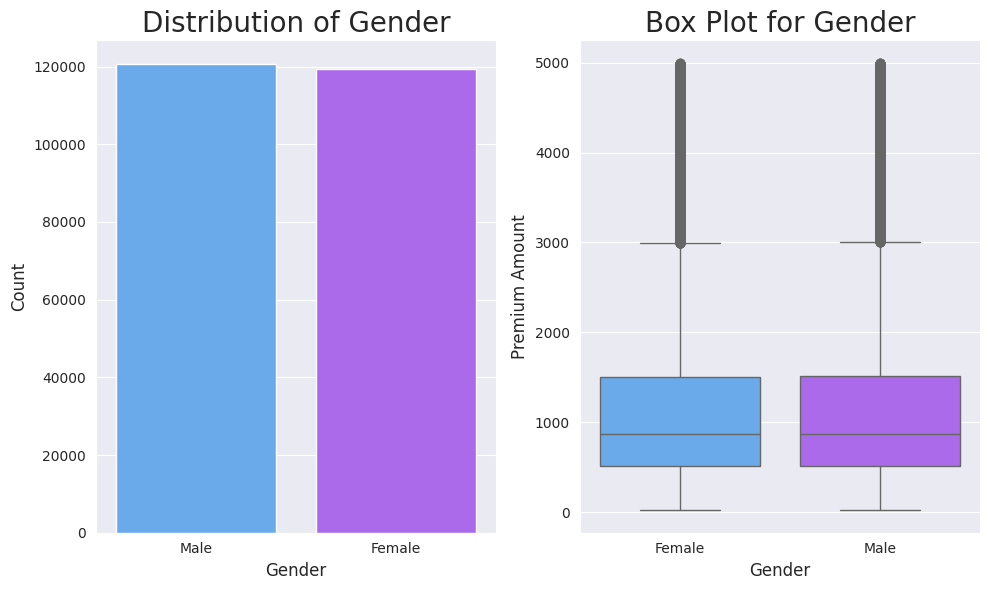

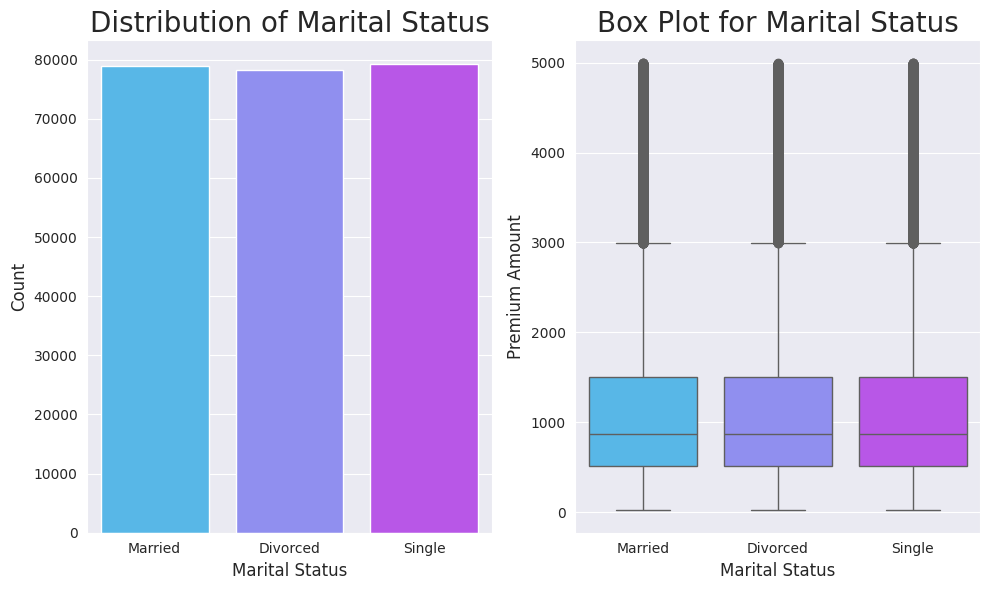

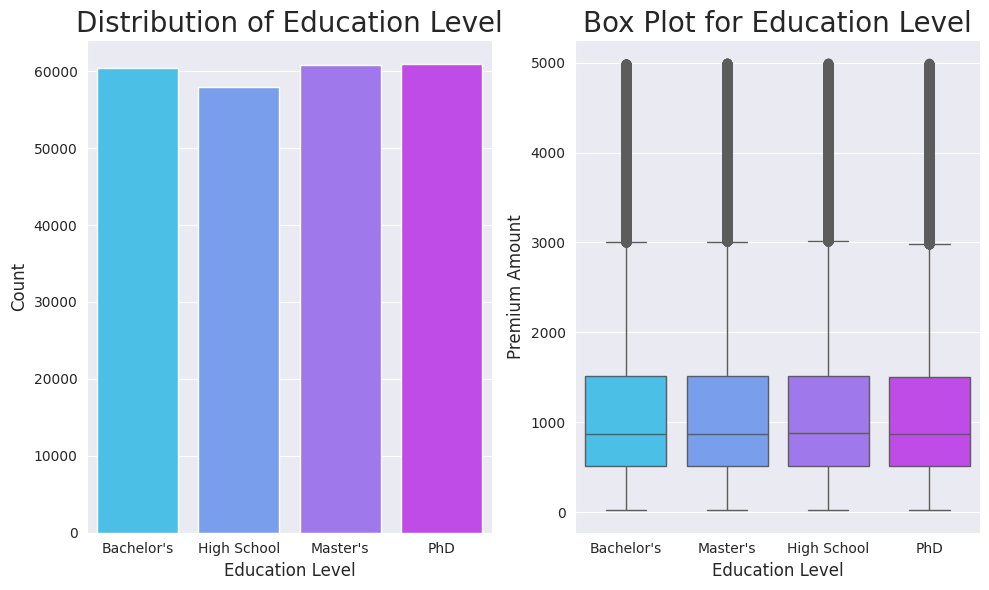

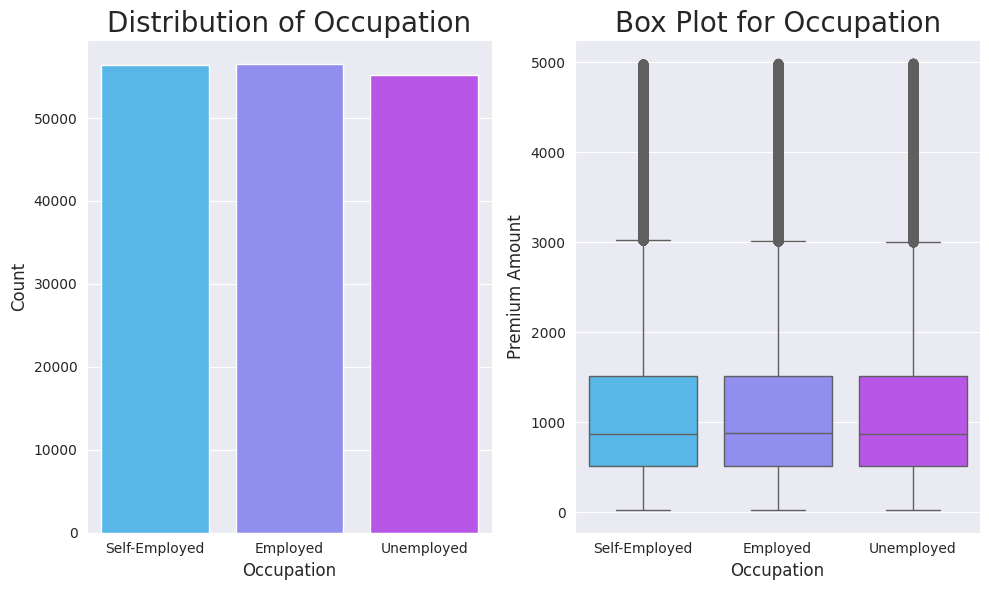

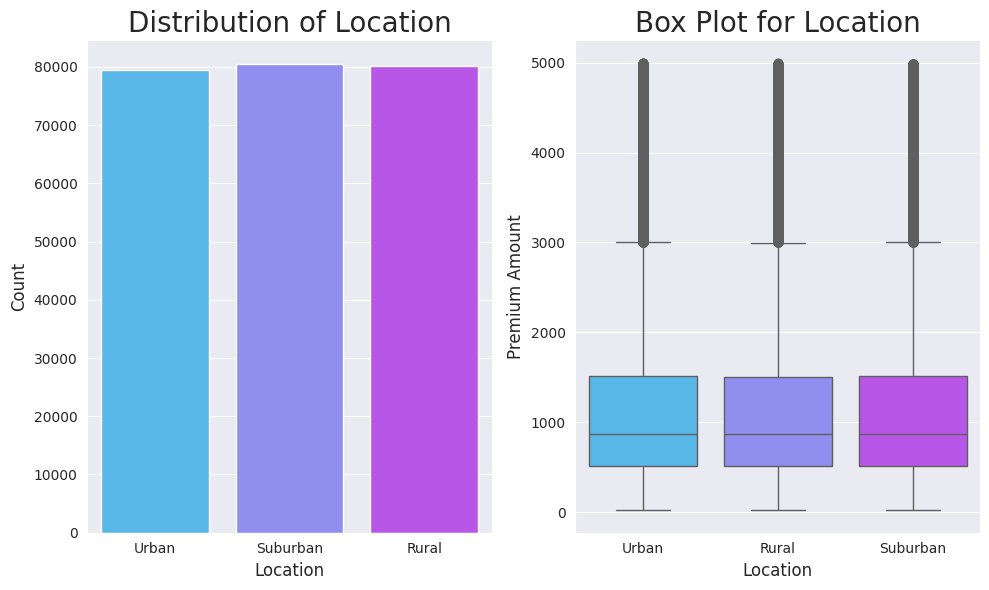

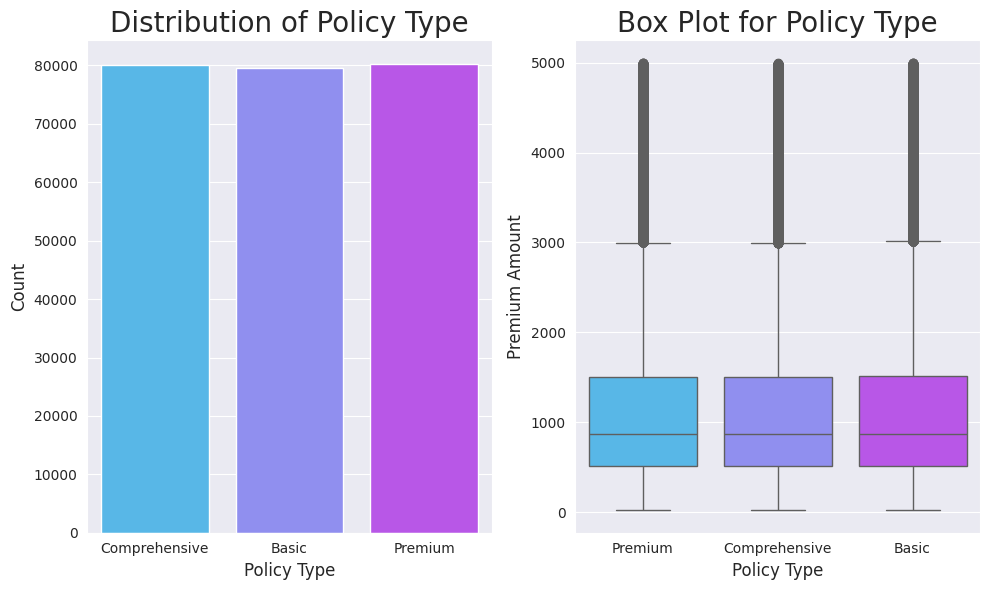

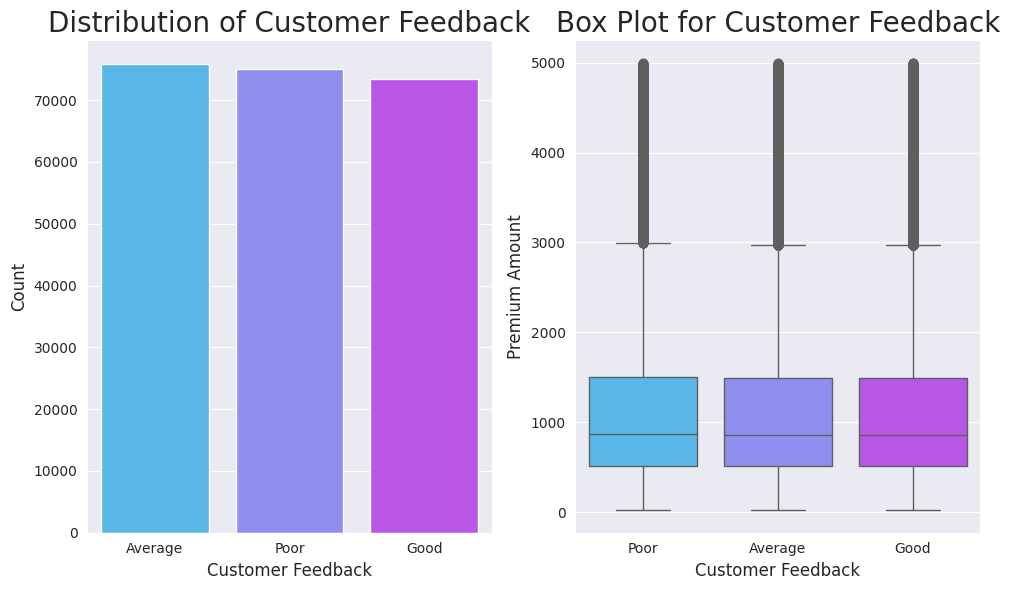

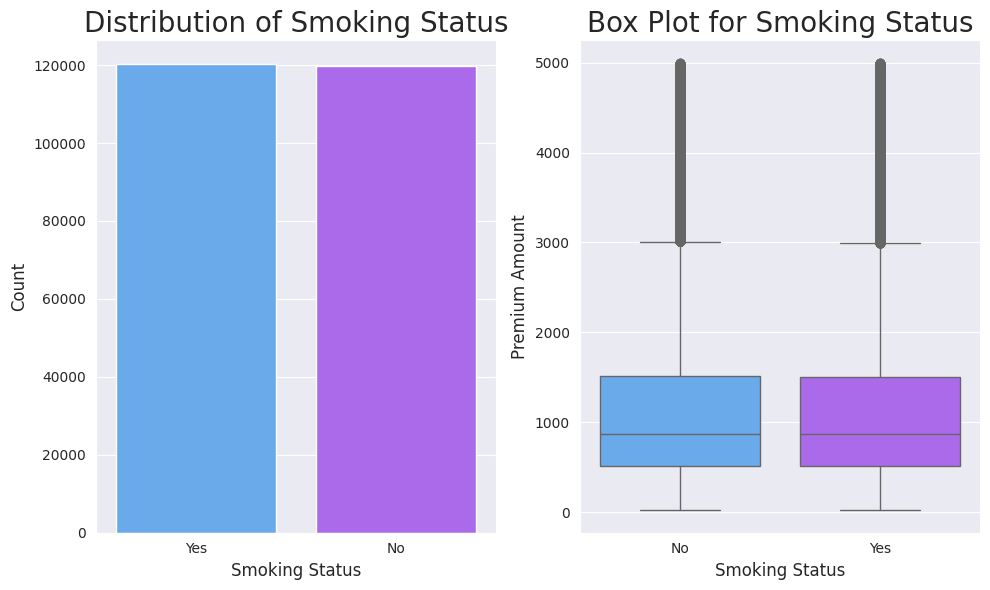

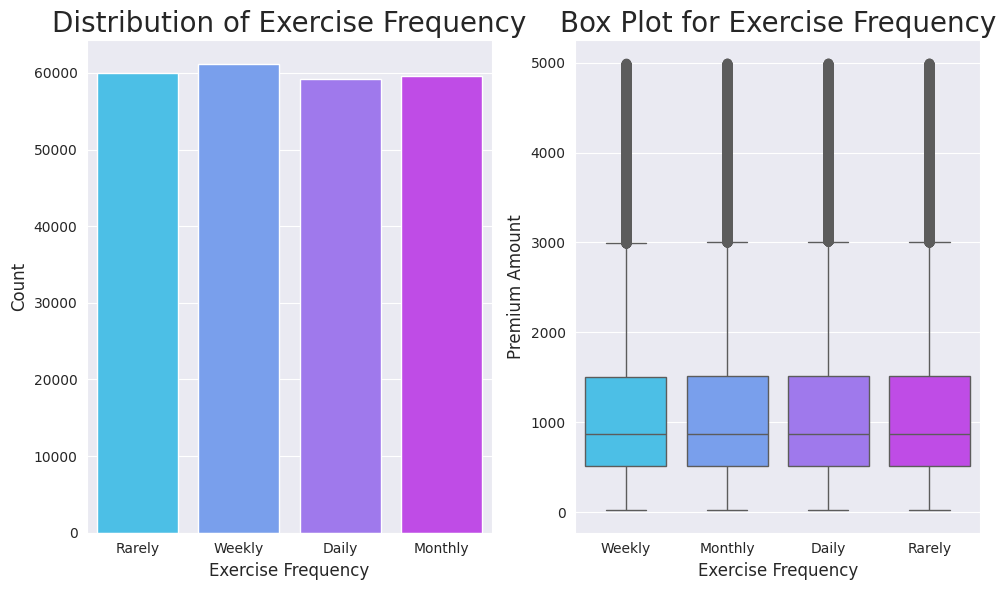

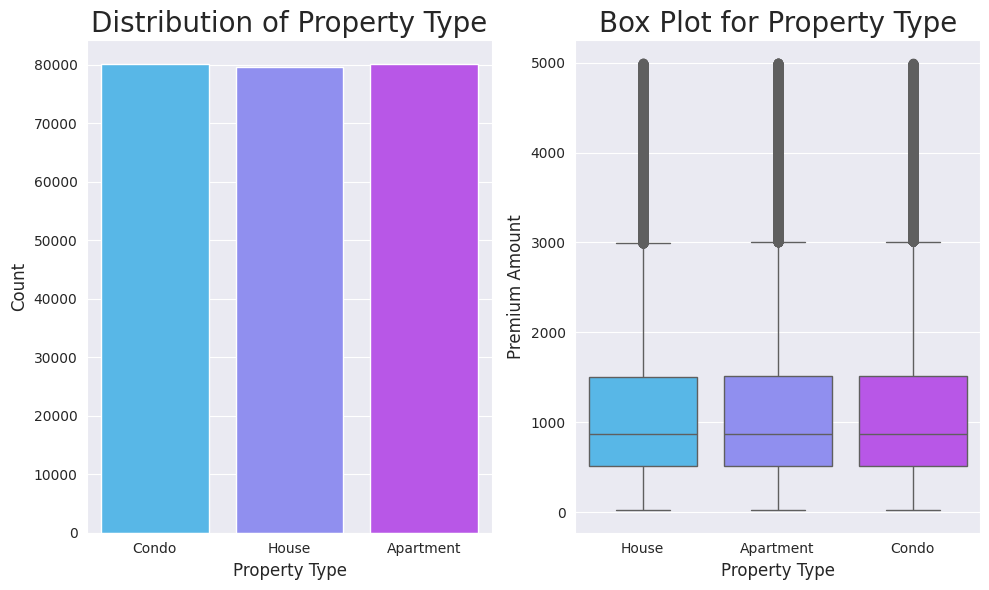

In [18]:
for i in cat_cols:
    if i=='Policy Start Date':
      continue
    fig , axes = plt.subplots(1,2 , figsize=(10,6))
    sns.countplot(data=sample_data, x=i, palette='cool', ax= axes[0])
    axes[0].set_title(f'Distribution of {i}', fontsize=20)
    axes[0].set_xlabel(i, fontsize=12)
    axes[0].set_ylabel('Count', fontsize=12)
    # BoxPlot
    sns.boxplot(train_df , x=i , y=tar_col ,palette= 'cool', ax= axes[1])
    axes[1].set_title(f"Box Plot for {i}" , fontsize = 20)
    axes[1].set_xlabel(i,fontsize=12)
    axes[1].set_ylabel(tar_col,fontsize=12)
    plt.tight_layout()
    plt.show()

## correlation

In [19]:
corr_matrix=train_df[num_cols].corr()

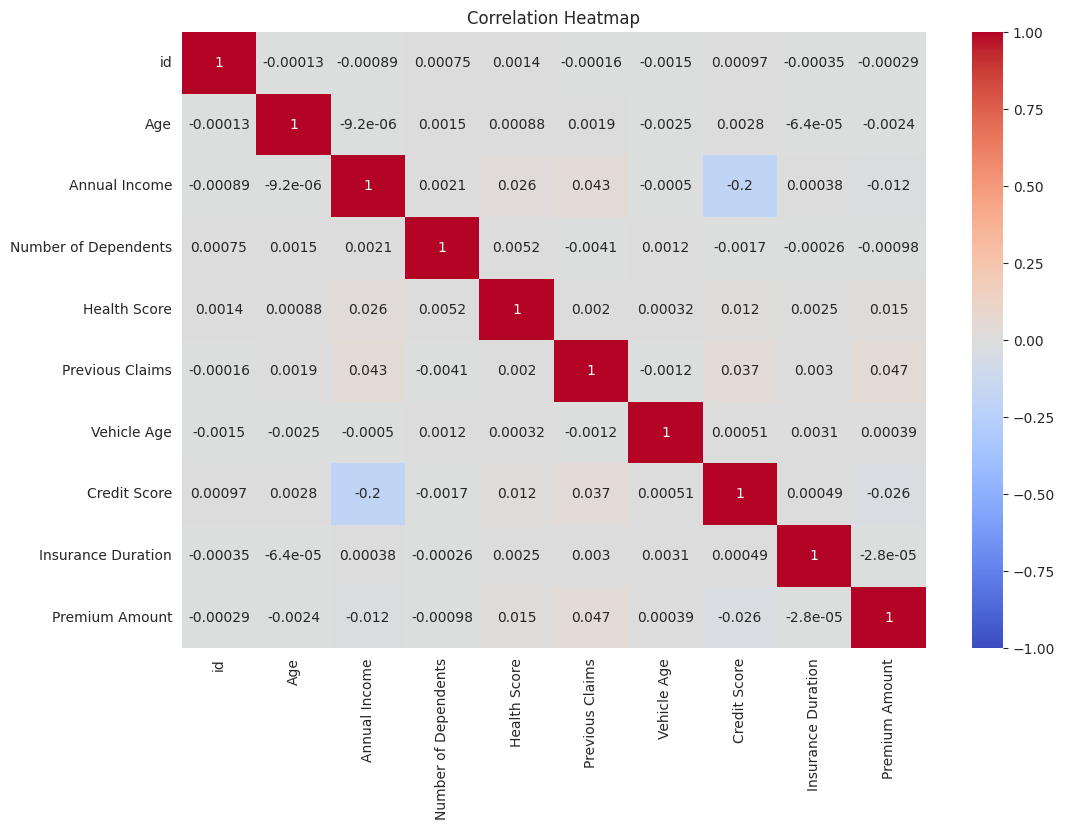

In [20]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

we have plotted the correlation matrix with numerical column only since .corr() does not work with categorical data

# Data Preprocessing And Feature Engineering

In [21]:
sampled_data = train_df.sample(frac=0.1, random_state=42)

In [22]:
num_c=['Age', 'Annual Income', 'Number of Dependents', 'Health Score', 'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration']

In [23]:
cat_c=['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type']

In [24]:
x_test=test_df[num_c + cat_c]

In [25]:
X=sampled_data[num_c + cat_c]

In [26]:
y=sampled_data['Premium Amount']

## Imputing numerical data

In [27]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median').fit(X[num_c])


In [28]:
X[num_c]=imputer.transform(X[num_c])
x_test[num_c]=imputer.transform(x_test[num_c])

## Feature scaling of numerical data

In [29]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler().fit(X[num_c])
X[num_c]=sc.transform(X[num_c])

mmsc=MinMaxScaler().fit(x_test[num_c])
x_test[num_c]=mmsc.transform(x_test[num_c])

## Encoding Categorical Data

In [30]:
from sklearn.preprocessing import OneHotEncoder


In [31]:
print(X.columns)

Index(['Age', 'Annual Income', 'Number of Dependents', 'Health Score',
       'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration',
       'Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location',
       'Policy Type', 'Customer Feedback', 'Smoking Status',
       'Exercise Frequency', 'Property Type'],
      dtype='object')


In [32]:
# Filling missing values for categorical columns using loc to avoid SettingWithCopyWarning
X.loc[:, cat_c] = X[cat_c].fillna('Unknown')
x_test.loc[:, cat_c] = x_test[cat_c].fillna('Unknown')

In [33]:
encoder=OneHotEncoder(handle_unknown='ignore').fit(X[cat_c])

In [34]:

encoded_list=list(encoder.get_feature_names_out(cat_c))

In [35]:
print(len(encoded_list))

33


In [36]:
X[encoded_list]=encoder.transform(X[cat_c]).toarray()
x_test[encoded_list]=encoder.transform(x_test[cat_c]).toarray()

In [37]:
print(len(X.columns))

51


## finalising the input and output

In [38]:
X=X[encoded_list + num_c]
x_test=x_test[encoded_list + num_c]

# Testing and Evaluating the model

In [39]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import StackingRegressor

linear regression

In [40]:
model1=LinearRegression()
rmsle_list = []
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# K-Fold cross-validation loop
for train_index, test_index in kf.split(X):
    # Split the data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    model1.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model1.predict(X_test)

    # Calculating the RMSE (Root Mean Squared Error)
    rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
    rmsle_list.append(rmsle)

    print(f"Fold RMSE: {rmsle}")

# Calculate the average RMSE across all folds
average_rmsle = np.mean(rmsle_list)
print(f"Average RMSE across all folds: {average_rmsle}")

Fold RMSE: 1.1804833377479576
Fold RMSE: 1.1636565408220019
Fold RMSE: 1.161586121785545
Fold RMSE: 1.1633261112633546
Fold RMSE: 1.170320796225749
Average RMSE across all folds: 1.1678745815689215


random forest

In [41]:
model2=RandomForestRegressor()
model2.fit(X,y)
y_pred=model2.predict(X)
rmsle=np.sqrt(mean_squared_log_error(y, y_pred))
print(f"rmsle for Gradient Boosting Regressor: {rmsle}")

rmsle for Gradient Boosting Regressor: 0.7474366418051269


In [44]:
y_test_pred=model2.predict(x_test)

GradientBoostingRegressor

In [42]:
model3=GradientBoostingRegressor()

model3.fit(X, y)
y_pred = model3.predict(X)
rmsle = np.sqrt(mean_squared_log_error(y, y_pred))
print(f"rmsle for Gradient Boosting Regressor: {rmsle}")

rmsle for Gradient Boosting Regressor: 1.1578055867509613


In [45]:
submission_test_df['Premium Amount']=y_test_pred

In [46]:
submission_test_df

,id,Premium Amount
0,1200000,1783.70
1,1200001,1219.39
2,1200002,1084.96
3,1200003,1196.38
4,1200004,1009.07
...,...,...
799995,1999995,1343.69
799996,1999996,1477.26
799997,1999997,967.56
799998,1999998,1204.54


In [47]:
submission_test_df.to_csv('submission.csv', index=None)

# Interpretation

In [49]:
model2.feature_importances_

array([0.00734678, 0.0072075 , 0.01027922, 0.01008266, 0.01007116,
       0.00608858, 0.01023005, 0.01014854, 0.0098593 , 0.01062476,
       0.00994531, 0.01021226, 0.01037048, 0.01038427, 0.00999718,
       0.00995567, 0.0100623 , 0.01007789, 0.0099142 , 0.00999885,
       0.00996984, 0.01010463, 0.00997154, 0.01385577, 0.00744684,
       0.00719645, 0.01040702, 0.0103472 , 0.0102409 , 0.01023096,
       0.00987535, 0.01005097, 0.01010797, 0.0914913 , 0.14413485,
       0.03573086, 0.14628447, 0.01778334, 0.07292408, 0.11689691,
       0.0520918 ])

In [50]:
importance_df = pd.DataFrame({
    'feature': num_c+encoded_list,
    'importance': model2.feature_importances_
}).sort_values('importance', ascending=False)
importance_df.head(10)

,feature,importance
36,Exercise Frequency_Rarely,0.146284
34,Exercise Frequency_Daily,0.144135
39,Property Type_Condo,0.116897
33,Smoking Status_Yes,0.091491
38,Property Type_Apartment,0.072924
40,Property Type_House,0.052092
35,Exercise Frequency_Monthly,0.035731
37,Exercise Frequency_Weekly,0.017783
23,Location_Suburban,0.013856
9,Gender_Male,0.010625


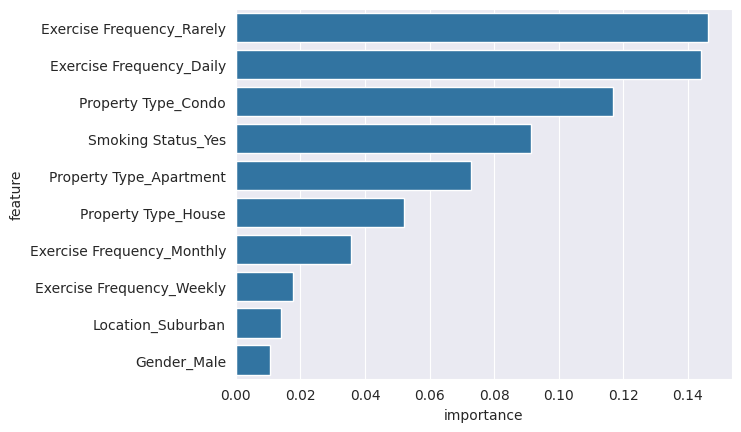

In [51]:
sns.barplot(data=importance_df.head(10), x='importance', y='feature');